In [569]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from csi.pipeline import kernels
import librosa
from librosa import display
from csi.vendor import simplefast
from csi.pipeline import ssm as ssmlib
import IPython.display as ipd

#audio_file = '/dataset/YTCdataset/letitbe/v0.mp3'
#audio_file = '/dataset/mazurkas/mazurka07-5/pid9070-17.mp3'

def generate_cic(audio_file):
    y, sr = librosa.load(audio_file)
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr, trim=False)
    seconds = len(y)/sr
    samples_per_beat = (60 * sr) / tempo
    chroma_orig = librosa.feature.chroma_stft(y, sr, hop_length=2**11)
    beat_f = librosa.util.fix_frames(beats, x_max=chroma_orig.shape[1])
    sync = librosa.util.sync(chroma_orig, beat_f, aggregate=np.median)
    #return calc_cic(sync)
    return calc_cic(chroma_orig)

def calc_cic(crm_arr):
    crmip = np.zeros(12)
    tmtx = []
    for crmi in crm_arr.T:
        row_d = []
        for d in np.arange(-5,7,1):
            sum_crm = 0
            for i in range(12):
                sum_crm = sum_crm + (crmip[i]*crmi[(i+d)%12])
            row_d.append(sum_crm)
        #row_d = row_d/np.linalg.norm(row_d)
        row_d = (row_d-np.min(row_d))/(np.max(row_d)-np.min(row_d))
        crmip = crmi
        if not np.isnan(row_d).any():
            tmtx.append(row_d)
    tmtx = np.array(tmtx)
    tmtx = tmtx[1:-1,:].T
    tmtx = tmtx.tolist()
    return np.array(tmtx)


In [657]:
files1 = ['/dataset/mazurkas/mazurka07-5/pid9105-09.mp3',
'/dataset/mazurkas/mazurka07-5/pid9072-09.mp3',
'/dataset/mazurkas/mazurka07-5/pid9065-06.mp3',
'/dataset/mazurkas/mazurka07-5/pid9094-09.mp3',
'/dataset/mazurkas/mazurka07-5/pid9174-09.mp3',
'/dataset/mazurkas/mazurka07-5/pid9067-09.mp3']
#maz1 = [generate_cic(f) for f in files1]
files2 = ['/dataset/mazurkas/mazurka06-4/pid9063-04.mp3',
'/dataset/mazurkas/mazurka06-4/pid9093-04.mp3',
'/dataset/mazurkas/mazurka06-4/pid9070-12.mp3',
'/dataset/mazurkas/mazurka06-4/pid9097-11.mp3',
'/dataset/mazurkas/mazurka06-4/pid9118-04.mp3',
'/dataset/mazurkas/mazurka06-4/pid9088-04.mp3'
]
#maz2 = [generate_cic(f) for f in files2]

files1 = [
    '/dataset/YTCdataset/letitbe/v0.mp3',
    '/dataset/YTCdataset/letitbe/v1.mp3',
    '/dataset/YTCdataset/letitbe/v2.mp3',
    '/dataset/YTCdataset/letitbe/v3.mp3',
    '/dataset/YTCdataset/letitbe/v4.mp3',
    '/dataset/YTCdataset/letitbe/v5.mp3',
    '/dataset/YTCdataset/letitbe/v6.mp3'
]
files2 = [
    '/dataset/YTCdataset/bo/v0.mp3',
    '/dataset/YTCdataset/bo/v1.mp3',
    '/dataset/YTCdataset/bo/v2.mp3',
    '/dataset/YTCdataset/bo/v3.mp3',
    '/dataset/YTCdataset/bo/v4.mp3',
    '/dataset/YTCdataset/bo/v5.mp3',
    '/dataset/YTCdataset/bo/v6.mp3'
]
maz1 = [generate_cic(f) for f in files1]
maz2 = [generate_cic(f) for f in files2]

/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161

In [658]:
audios = maz1 + maz2

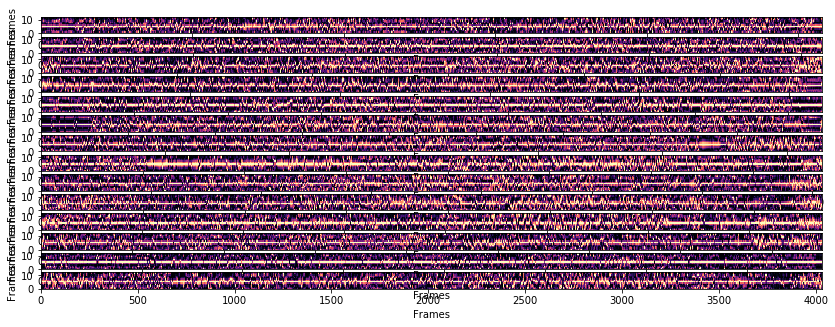

In [659]:
plt.figure(figsize=(14, 5))
for a in range(len(audios)):
    plt.subplot(len(audios), 1, a+1)
    display.specshow(audios[a], y_axis='frames', x_axis='frames')
plt.show()


In [660]:
def normalize(x):
  arr = np.array(x) - min(x)
  return (arr/np.amax(arr))**2

def arr(aud_idx, lvl):
    return np.array([np.argsort(1 - audios[aud_idx].T[i])[0:lvl] for i in range(len(audios[aud_idx][0]))])

def quantize(feature):
    return np.array([quantize_map(f) for f in np.array(feature).T]).T

def quantize_map(vals):
    bins = np.arange(10)/10
    idxs = np.digitize(vals, bins)
    return np.array([bins[i-1] for i in idxs])


In [661]:
audios = maz1 + maz2
audios_sqrd = [arr(i, 2) for i in range(len(audios))]
audios_sqrd = [["".join([chr(i) for i in a]) for a in (x + 65)] for x in audios_sqrd]
audios_sqrd = [['.'.join(x) for x in zip(audios_sqrd[i],audios_sqrd[i][1:])] for i in range(len(audios_sqrd))]
audios_sqrd

a2 = [arr(i, 2) for i in range(len(audios))]
a2 = [["".join([chr(i) for i in a]) for a in (x + 65)] for x in a2]
a2

a3 = [arr(i, 3) for i in range(len(audios))]
a3 = [["".join([chr(i) for i in a]) for a in (x + 65)] for x in a3]
a3

a4 = [arr(i, 4) for i in range(len(audios))]
a4 = [["".join([chr(i) for i in a]) for a in (x + 65)] for x in a4]
a4


audios2 = [audios_sqrd[i] + a3[i] + a4[i] for i in range(len(audios))]
#audios2 = [a2[i] for i in range(len(audios))]
#[len(a) for a in audios2]

In [669]:
[len(np.unique(a)) for a in audios2]

[2209,
 2253,
 2844,
 1560,
 1905,
 1981,
 2218,
 2790,
 2919,
 2795,
 2664,
 2917,
 1895,
 3048]

In [662]:
import hashedindex
index = hashedindex.HashedIndex()
for song_idx in range(len(audios2)):
    for word in audios2[song_idx]:
        index.add_term_occurrence(word, song_idx)




In [663]:
import pandas as pd
X  = index.generate_feature_matrix(mode='tfidf')
df = pd.DataFrame(X, columns=index.terms(), index=index.documents())
df

,CK.JF,FIAB,FHCG,BLIK,LCD,FB.GF,GKLF,FG.FK,LF.AF,AL.KB,...,GF.DC,ALEF,IHBJ,BC.JF,BL.FH,CIJ,DA.LK,FLKE,ED.KL,BJIA
0,0.90309,0.20412,0.000000,0.00000,0.00000,0.20412,0.00000,0.196201,0.000000,0.00000,...,0.00000,0.359022,0.000000,0.000000,0.00000,0.000000,0.00000,0.115984,0.00000,0.00000
1,0.00000,0.40824,0.000000,0.00000,0.00000,0.61236,0.00000,0.532546,0.000000,0.00000,...,0.00000,0.359022,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.60206,0.00000
2,0.00000,0.00000,0.000000,0.00000,0.00000,0.20412,0.00000,0.364373,0.000000,0.00000,...,0.20412,0.359022,0.000000,0.425969,0.00000,0.851937,0.00000,0.173976,1.80618,0.00000
3,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.392402,0.000000,0.00000,...,0.40824,0.359022,0.726999,0.000000,0.00000,0.000000,0.00000,0.231968,0.00000,0.00000
4,0.00000,0.20412,0.000000,0.00000,0.00000,0.00000,0.00000,0.392402,0.000000,0.00000,...,0.20412,0.000000,0.000000,0.000000,0.00000,0.425969,0.00000,0.057992,0.00000,0.60206
5,0.00000,0.00000,0.000000,0.00000,0.00000,0.20412,0.00000,0.224230,0.000000,0.00000,...,0.20412,0.000000,0.726999,0.000000,0.00000,0.000000,0.00000,0.115984,0.00000,0.00000
6,0.00000,0.20412,0.000000,0.00000,0.00000,0.00000,0.00000,0.476488,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.057992,1.20412,0.00000
7,0.00000,0.20412,0.000000,0.00000,0.00000,0.00000,0.00000,0.308316,0.000000,0.00000,...,0.20412,0.359022,0.000000,0.000000,0.00000,0.000000,0.00000,0.231968,0.00000,0.00000
8,0.00000,0.20412,0.726999,0.00000,0.00000,0.20412,0.50515,0.420431,0.000000,0.90309,...,0.40824,0.000000,0.000000,0.000000,0.90309,0.425969,0.90309,0.115984,0.00000,0.60206
9,0.00000,0.00000,0.000000,0.00000,0.00000,0.40824,0.50515,0.560574,0.000000,0.00000,...,0.40824,0.000000,0.000000,0.425969,0.00000,0.000000,0.00000,0.057992,0.00000,0.60206


In [654]:
#df.iloc[0]['CK.JF']

In [666]:
amnt = len(audios2)
mtx = np.zeros((amnt, amnt))
t = 0.5

for song_idx in range(amnt):
    song = np.unique(audios2[song_idx])
    for word_idx in range(len(song)):
        word = song[word_idx]
        #word_freqs = index.get_documents(word)
        for song_idx2 in range(amnt):
            if song_idx != song_idx2:
                word_tfidf = df.iloc[song_idx2][word]
                if word_tfidf > t:
                    mtx[song_idx][song_idx2] += 1
                    mtx[song_idx2][song_idx] += 1
mtx


array([[  0.        , 365.56201075, 381.65155268, 292.74182305,
        274.37456359, 303.80206437, 411.08830631, 506.24374666,
        519.3966535 , 524.4400909 , 477.86067204, 534.86379012,
        579.11877621, 533.561958  ],
       [365.56201075,   0.        , 400.3055039 , 285.53728871,
        294.77445597, 319.20508318, 414.79210366, 490.35063295,
        554.14493508, 506.75749703, 481.83544642, 546.5297242 ,
        611.01802361, 569.26566756],
       [381.65155268, 400.3055039 ,   0.        , 366.52573075,
        358.66878291, 380.27741604, 463.25579094, 617.48478475,
        552.36002274, 669.4390254 , 592.14341256, 697.28089204,
        568.61629628, 687.77691874],
       [292.74182305, 285.53728871, 366.52573075,   0.        ,
        261.33019083, 294.53574016, 371.57556125, 438.55723619,
        379.4891506 , 448.44216863, 453.18146607, 498.91629834,
        391.87933074, 473.88318636],
       [274.37456359, 294.77445597, 358.66878291, 261.33019083,
          0.        

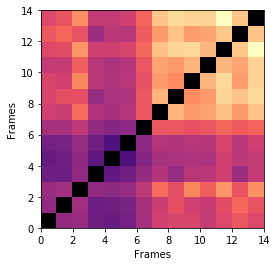

array([[  0.        , 365.56201075, 381.65155268, 292.74182305,
        274.37456359, 303.80206437, 411.08830631, 506.24374666,
        519.3966535 , 524.4400909 , 477.86067204, 534.86379012,
        579.11877621, 533.561958  ],
       [365.56201075,   0.        , 400.3055039 , 285.53728871,
        294.77445597, 319.20508318, 414.79210366, 490.35063295,
        554.14493508, 506.75749703, 481.83544642, 546.5297242 ,
        611.01802361, 569.26566756],
       [381.65155268, 400.3055039 ,   0.        , 366.52573075,
        358.66878291, 380.27741604, 463.25579094, 617.48478475,
        552.36002274, 669.4390254 , 592.14341256, 697.28089204,
        568.61629628, 687.77691874],
       [292.74182305, 285.53728871, 366.52573075,   0.        ,
        261.33019083, 294.53574016, 371.57556125, 438.55723619,
        379.4891506 , 448.44216863, 453.18146607, 498.91629834,
        391.87933074, 473.88318636],
       [274.37456359, 294.77445597, 358.66878291, 261.33019083,
          0.        

In [667]:
#xx = np.array([np.round(normalize(x), 2) for x in mtx])
xx = mtx
plt.figure(figsize=(4, 4))
display.specshow(xx, **{'y_axis':'frames', 'x_axis':'frames'})
plt.show()
mtx

In [ ]:

quantized_arr = [quantize(i) for i in audios]

amnt = len(quantized_arr)
mtx = np.zeros((amnt, amnt))
for song1 in range(len(quantized_arr)):
    for song2 in range(len(quantized_arr)):
        for i in set([r.tobytes() for r in quantized_arr[song1]]):
            for j in set([r.tobytes() for r in quantized_arr[song2]]):
                if np.array_equal(i, j):
                    mtx[song1][song2]+=1
mtx


['FG.DH',
 'DH.FB',
 'FB.FE',
 'FE.FE',
 'FE.FG',
 'FG.FE',
 'FE.FE',
 'FE.FG',
 'FG.FG',
 'FG.FJ',
 'FJ.FB',
 'FB.FE',
 'FE.FE',
 'FE.FG',
 'FG.FJ',
 'FJ.FJ',
 'FJ.FB',
 'FB.FG',
 'FG.HD',
 'HD.FI',
 'FI.FC',
 'FC.FI',
 'FI.FC',
 'FC.FI',
 'FI.FC',
 'FC.FI',
 'FI.FC',
 'FC.FI',
 'FI.FE',
 'FE.FC',
 'FC.FG',
 'FG.FE',
 'FE.FE',
 'FE.FG',
 'FG.FE',
 'FE.FC',
 'FC.DG',
 'DG.FB',
 'FB.FB',
 'FB.FJ',
 'FJ.FB',
 'FB.FB',
 'FB.FC',
 'FC.FG',
 'FG.FE',
 'FE.FJ',
 'FJ.FB',
 'FB.FJ',
 'FJ.FB',
 'FB.FJ',
 'FJ.FA',
 'FA.FJ',
 'FJ.FJ',
 'FJ.FB',
 'FB.FB',
 'FB.FB',
 'FB.FJ',
 'FJ.FJ',
 'FJ.FB',
 'FB.FB',
 'FB.FB',
 'FB.FE',
 'FE.KF',
 'KF.FC',
 'FC.FG',
 'FG.FG',
 'FG.FD',
 'FD.FG',
 'FG.FG',
 'FG.FD',
 'FD.FD',
 'FD.FJ',
 'FJ.FB',
 'FB.FK',
 'FK.FE',
 'FE.FE',
 'FE.FE',
 'FE.FE',
 'FE.FG',
 'FG.FE',
 'FE.JF',
 'JF.FB',
 'FB.FA',
 'FA.FA',
 'FA.FK',
 'FK.FJ',
 'FJ.FB',
 'FB.FA',
 'FA.FK',
 'FK.AH',
 'AH.FB',
 'FB.FC',
 'FC.FI',
 'FI.FC',
 'FC.FI',
 'FI.FI',
 'FI.FI',
 'FI.FK',
 'FK.FA',
 'FA.FI',


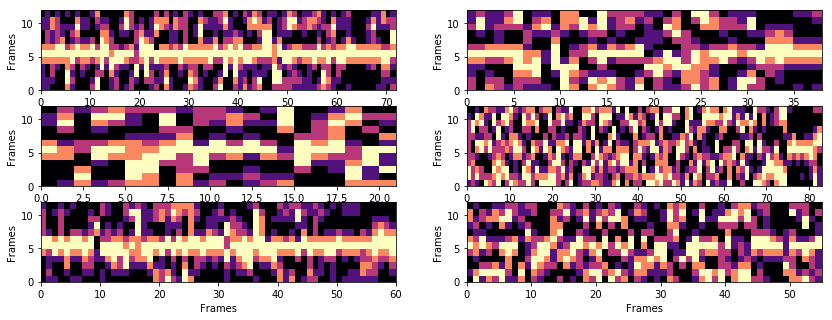

In [158]:
plt.figure(figsize=(14, 5))
for a in range(len(audios)):
    plt.subplot(3, 2, a+1)
    display.specshow(quantized_arr[a], y_axis='frames', x_axis='frames')
plt.show()
